In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Cust_Segmentation.com")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [7]:
data.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
in_data=PCA(n_components=2)

In [21]:
sca_data=in_data.fit_transform(data)

In [12]:
data.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [13]:
data.Defaulted.value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [15]:
data.Defaulted=data.Defaulted.fillna(data.Defaulted.mean())

In [17]:
data.Defaulted.value_counts()

0.000000    517
1.000000    183
0.261429    150
Name: Defaulted, dtype: int64

In [22]:
sca_data

array([[-424.41888734,  -28.35411649],
       [-423.66835698,   54.87489377],
       [-422.52477057,    9.11618281],
       ...,
       [ 422.5982909 ,  -29.10261125],
       [ 423.54591301,  -17.23861663],
       [ 424.43822183,   20.95240113]])

In [23]:
cols=["fea1","fea2"]
df=pd.DataFrame(sca_data,columns=cols)

In [24]:
df

,fea1,fea2
0,-424.418887,-28.354116
1,-423.668357,54.874894
2,-422.524771,9.116183
3,-421.415028,-29.810296
4,-421.111235,206.596068
...,...,...
845,420.560676,-20.493780
846,421.535632,-12.232312
847,422.598291,-29.102611
848,423.545913,-17.238617


In [25]:
from sklearn.cluster import KMeans
km=KMeans()

In [27]:
sse=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",random_state=0)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\gowtham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0.5, 1.0, 'elbow curve')

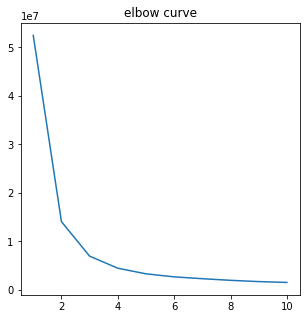

In [107]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11),sse)
plt.title("elbow curve")

In [86]:
km=KMeans(n_clusters=3,init="k-means++",random_state=0)

In [87]:
df["cluster"]=km.fit_predict(df)

In [102]:
a=km.fit_predict(df)

In [104]:
df.head()


,fea1,fea2,cluster
0,-424.418887,-28.354116,1
1,-423.668357,54.874894,1
2,-422.524771,9.116183,1
3,-421.415028,-29.810296,1
4,-421.111235,206.596068,1


In [105]:
a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

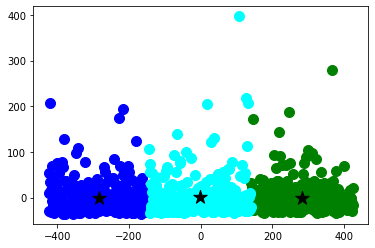

In [109]:
df1=df[df["cluster"]==0]
df2=df[df["cluster"]==1]
df3=df[df["cluster"]==2]
plt.scatter(df1.fea1,df1.fea2,c="g",s=100)
plt.scatter(df2.fea1,df2.fea2,c="b",s=100)
plt.scatter(df3.fea1,df3.fea2,c="cyan",s=100)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,c="black",marker="*")